<a href="https://colab.research.google.com/github/SumiranRai/MDSC-Lab/blob/main/MDSC-201-Statistical-Methods-Using-R/R_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R Programming Assignment V

By Sumiran Rai

Roll No: 24040208007

# Data Transformation using dplyr

## Prerequisties

In [ ]:
install.packages("nycflights13")
library(nycflights13)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



This dataset contains all 336,776 flights that departed from New York City in 2013. The data comes from the US Bureau of Transportation Statistics and is documented in ?flights.

In [ ]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


flights is a tibble, a special type of data frame used by the tidyverse to avoid some common gotchas. The most important difference between tibbles and data frames is the way tibbles print; they are designed for large datasets, so they only show the first few rows and only the columns that fit on one screen

You can use print(flights, width = Inf) to show all columns, or use glimpse():


In [ ]:
glimpse(flights)

Rows: 336,776
Columns: 19
$ year           <int> 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2…
$ month          <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ day            <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ dep_time       <int> 517, 533, 542, 544, 554, 554, 555, 557, 557, 558, 558, …
$ sched_dep_time <int> 515, 529, 540, 545, 600, 558, 600, 600, 600, 600, 600, …
$ dep_delay      <dbl> 2, 4, 2, -1, -6, -4, -5, -3, -3, -2, -2, -2, -2, -2, -1…
$ arr_time       <int> 830, 850, 923, 1004, 812, 740, 913, 709, 838, 753, 849,…
$ sched_arr_time <int> 819, 830, 850, 1022, 837, 728, 854, 723, 846, 745, 851,…
$ arr_delay      <dbl> 11, 20, 33, -18, -25, 12, 19, -14, -8, 8, -2, -3, 7, -1…
$ carrier        <chr> "UA", "UA", "AA", "B6", "DL", "UA", "B6", "EV", "B6", "…
$ flight         <int> 1545, 1714, 1141, 725, 461, 1696, 507, 5708, 79, 301, 4…
$ tailnum        <chr> "N14228", "N24211", "N619AA", "N804JB", "N668DN", "N394…
$ origin      

In both views, the variable names are followed by abbreviations that tell you the type of each variable: <int> is short for integer, <dbl> is short for double (aka real numbers), <chr> for character (aka strings), and <dttm> for date-time.


## dplyr basics

The first argument is always a data frame.

The subsequent arguments typically describe which columns to operate on using the variable names (without quotes).

The output is always a new data frame.

Because each verb does one thing well, solving complex problems will usually require combining multiple verbs, and we’ll do so with the pipe, |>.

The pipe takes the thing on its left and passes it along to the function on its right so that x |> f(y) is equivalent to f(x, y), and x |> f(y) |> g(z) is equivalent to g(f(x, y), z). The easiest way to pronounce the pipe is “then”.

In [ ]:
flights |>
  filter(dest == "IAH") |>
  group_by(year, month, day) |>
  summarize(
    arr_delay = mean(arr_delay, na.rm = TRUE)
  )

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,arr_delay
<int>,<int>,<int>,<dbl>
2013,1,1,17.850000
2013,1,2,7.000000
2013,1,3,18.315789
2013,1,4,-3.200000
2013,1,5,20.230769
2013,1,6,9.277778
2013,1,7,-7.736842
2013,1,8,7.789474
2013,1,9,18.055556


## Rows

The most important verbs that operate on rows of a dataset are filter(), which changes which rows are present without changing their order, and arrange(), which changes the order of the rows without changing which are present. Both functions only affect the rows, and the columns are left unchanged. We’ll also discuss distinct() which finds rows with unique values. Unlike arrange() and filter() it can also optionally modify the columns.

### filter()

filter() allows you to keep rows based on the values of the columns1. The first argument is the data frame. The second and subsequent arguments are the conditions that must be true to keep the row. For example, we could find all flights that departed more than 120 minutes (two hours) late:

In [ ]:
flights |>
  filter(dep_delay > 120)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
2013,1,1,957,733,144,1056,853,123,UA,856,N534UA,EWR,BOS,37,200,7,33,2013-01-01 07:00:00
2013,1,1,1114,900,134,1447,1222,145,UA,1086,N76502,LGA,IAH,248,1416,9,0,2013-01-01 09:00:00
2013,1,1,1540,1338,122,2020,1825,115,B6,705,N570JB,JFK,SJU,193,1598,13,38,2013-01-01 13:00:00
2013,1,1,1815,1325,290,2120,1542,338,EV,4417,N17185,EWR,OMA,213,1134,13,25,2013-01-01 13:00:00
2013,1,1,1842,1422,260,1958,1535,263,EV,4633,N18120,EWR,BTV,46,266,14,22,2013-01-01 14:00:00
2013,1,1,1856,1645,131,2212,2005,127,AA,181,N323AA,JFK,LAX,336,2475,16,45,2013-01-01 16:00:00
2013,1,1,1934,1725,129,2126,1855,151,MQ,4255,N909MQ,JFK,BNA,154,765,17,25,2013-01-01 17:00:00
2013,1,1,1938,1703,155,2109,1823,166,EV,4300,N18557,EWR,RIC,68,277,17,3,2013-01-01 17:00:00


As well as > (greater than), you can use >= (greater than or equal to), < (less than), <= (less than or equal to), == (equal to), and != (not equal to). You can also combine conditions with & or , to indicate “and” (check for both conditions) or with | to indicate “or” (check for either condition):

In [ ]:
# Flights that departed on January 1
flights |>
  filter(month == 1 & day == 1)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


There’s a useful shortcut when you’re combining | and ==: %in%. It keeps rows where the variable equals one of the values on the right:

In [ ]:
# A shorter way to select flights that departed in January or February
flights |>
  filter(month %in% c(1, 2))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


When you run filter() dplyr executes the filtering operation, creating a new data frame, and then prints it. It doesn’t modify the existing flights dataset because dplyr functions never modify their inputs. To save the result, you need to use the assignment operator, <-:

In [ ]:
jan1 <- flights |>
  filter(month == 1 & day == 1)

### arrange()

arrange() changes the order of the rows based on the value of the columns. It takes a data frame and a set of column names (or more complicated expressions) to order by. If you provide more than one column name, each additional column will be used to break ties in the values of the preceding columns. For example, the following code sorts by the departure time, which is spread over four columns. We get the earliest years first, then within a year, the earliest months, etc

In [ ]:
flights |>
  arrange(year, month, day, dep_time)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


You can use desc() on a column inside of arrange() to re-order the data frame based on that column in descending (big-to-small) order. For example, this code orders flights from most to least delayed:

In [ ]:
flights |>
  arrange(desc(dep_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,6,27,959,1900,899,1236,2226,850,DL,2007,N3762Y,JFK,PDX,313,2454,19,0,2013-06-27 19:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00


Note that the number of rows has not changed – we’re only arranging the data, we’re not filtering it.

### distinct()

distinct() finds all the unique rows in a dataset, so technically, it primarily operates on the rows. Most of the time, however, you’ll want the distinct combination of some variables, so you can also optionally supply column names:

In [ ]:
# Remove duplicate rows, if any
flights |>
  distinct()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


In [ ]:
# Find all unique origin and destination pairs
flights |>
  distinct(origin, dest)

origin,dest
<chr>,<chr>
EWR,IAH
LGA,IAH
JFK,MIA
JFK,BQN
LGA,ATL
EWR,ORD
EWR,FLL
LGA,IAD
JFK,MCO


Alternatively, if you want to keep other columns when filtering for unique rows, you can use the .keep_all = TRUE option.

In [ ]:
flights |>
  distinct(origin, dest, .keep_all = TRUE)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


It’s not a coincidence that all of these distinct flights are on January 1: distinct() will find the first occurrence of a unique row in the dataset and discard the rest.

If you want to find the number of occurrences instead, you’re better off swapping distinct() for count(). With the sort = TRUE argument, you can arrange them in descending order of the number of occurrences.

In [ ]:
flights |>
  count(origin, dest, sort = TRUE)

origin,dest,n
<chr>,<chr>,<int>
JFK,LAX,11262
LGA,ATL,10263
LGA,ORD,8857
JFK,SFO,8204
LGA,CLT,6168
EWR,ORD,6100
JFK,BOS,5898
LGA,MIA,5781
JFK,MCO,5464


## Columns

There are four important verbs that affect the columns without changing the rows: mutate() creates new columns that are derived from the existing columns, select() changes which columns are present, rename() changes the names of the columns, and relocate() changes the positions of the columns.

### mutate()

The job of mutate() is to add new columns that are calculated from the existing columns. In the transform chapters, you’ll learn a large set of functions that you can use to manipulate different types of variables. For now, we’ll stick with basic algebra, which allows us to compute the gain, how much time a delayed flight made up in the air, and the speed in miles per hour:

In [ ]:
flights |>
  mutate(
    gain = dep_delay - arr_delay,
    speed = distance / air_time * 60
  )

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,⋯,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,gain,speed
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dbl>,<dbl>
2013,1,1,517,515,2,830,819,11,UA,⋯,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,-9,370.0441
2013,1,1,533,529,4,850,830,20,UA,⋯,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,-16,374.2731
2013,1,1,542,540,2,923,850,33,AA,⋯,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,-31,408.3750
2013,1,1,544,545,-1,1004,1022,-18,B6,⋯,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,17,516.7213
2013,1,1,554,600,-6,812,837,-25,DL,⋯,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,19,394.1379
2013,1,1,554,558,-4,740,728,12,UA,⋯,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,-16,287.6000
2013,1,1,555,600,-5,913,854,19,B6,⋯,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,-24,404.4304
2013,1,1,557,600,-3,709,723,-14,EV,⋯,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,11,259.2453
2013,1,1,557,600,-3,838,846,-8,B6,⋯,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,5,404.5714


By default, mutate() adds new columns on the right-hand side of your dataset, which makes it difficult to see what’s happening here. We can use the .before argument to instead add the variables to the left-hand side2:

In [ ]:
flights |>
  mutate(
    gain = dep_delay - arr_delay,
    speed = distance / air_time * 60,
    .before = 1
  )

gain,speed,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,⋯,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
-9,370.0441,2013,1,1,517,515,2,830,819,⋯,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
-16,374.2731,2013,1,1,533,529,4,850,830,⋯,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
-31,408.3750,2013,1,1,542,540,2,923,850,⋯,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
17,516.7213,2013,1,1,544,545,-1,1004,1022,⋯,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
19,394.1379,2013,1,1,554,600,-6,812,837,⋯,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
-16,287.6000,2013,1,1,554,558,-4,740,728,⋯,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
-24,404.4304,2013,1,1,555,600,-5,913,854,⋯,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
11,259.2453,2013,1,1,557,600,-3,709,723,⋯,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
5,404.5714,2013,1,1,557,600,-3,838,846,⋯,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


The . indicates that .before is an argument to the function, not the name of a third new variable we are creating. You can also use .after to add after a variable, and in both .before and .after you can use the variable name instead of a position. For example, we could add the new variables after day:

In [ ]:
flights |>
  mutate(
    gain = dep_delay - arr_delay,
    speed = distance / air_time * 60,
    .after = day
  )

year,month,day,gain,speed,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,⋯,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,⋯,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,-9,370.0441,517,515,2,830,819,⋯,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,-16,374.2731,533,529,4,850,830,⋯,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,-31,408.3750,542,540,2,923,850,⋯,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,17,516.7213,544,545,-1,1004,1022,⋯,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,19,394.1379,554,600,-6,812,837,⋯,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,-16,287.6000,554,558,-4,740,728,⋯,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,-24,404.4304,555,600,-5,913,854,⋯,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,11,259.2453,557,600,-3,709,723,⋯,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,5,404.5714,557,600,-3,838,846,⋯,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


Alternatively, you can control which variables are kept with the .keep argument. A particularly useful argument is "used" which specifies that we only keep the columns that were involved or created in the mutate() step. For example, the following output will contain only the variables dep_delay, arr_delay, air_time, gain, hours, and gain_per_hour.

In [ ]:
flights |>
  mutate(
    gain = dep_delay - arr_delay,
    hours = air_time / 60,
    gain_per_hour = gain / hours,
    .keep = "used"
  )

dep_delay,arr_delay,air_time,gain,hours,gain_per_hour
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,11,227,-9,3.7833333,-2.3788546
4,20,227,-16,3.7833333,-4.2290749
2,33,160,-31,2.6666667,-11.6250000
-1,-18,183,17,3.0500000,5.5737705
-6,-25,116,19,1.9333333,9.8275862
-4,12,150,-16,2.5000000,-6.4000000
-5,19,158,-24,2.6333333,-9.1139241
-3,-14,53,11,0.8833333,12.4528302
-3,-8,140,5,2.3333333,2.1428571


Note that since we haven’t assigned the result of the above computation back to flights, the new variables gain, hours, and gain_per_hour will only be printed but will not be stored in a data frame. And if we want them to be available in a data frame for future use, we should think carefully about whether we want the result to be assigned back to flights, overwriting the original data frame with many more variables, or to a new object. Often, the right answer is a new object that is named informatively to indicate its contents, e.g., delay_gain, but you might also have good reasons for overwriting flights.

### select()

It’s not uncommon to get datasets with hundreds or even thousands of variables. In this situation, the first challenge is often just focusing on the variables you’re interested in. select() allows you to rapidly zoom in on a useful subset using operations based on the names of the variables:



Select columns by name:

In [ ]:
flights |>
  select(year, month, day)

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


Select all columns between year and day (inclusive):

In [ ]:
flights |>
  select(year:day)

year,month,day
<int>,<int>,<int>
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


Select all columns between year and day (inclusive):

In [ ]:
flights |>
  select(!year:day)

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


Historically this operation was done with - instead of !, so you’re likely to see that in the wild. These two operators serve the same purpose but with subtle differences in behavior. We recommend using ! because it reads as “not” and combines well with & and |

Select all columns that are characters:

In [ ]:
flights |>
  select(where(is.character))

carrier,tailnum,origin,dest
<chr>,<chr>,<chr>,<chr>
UA,N14228,EWR,IAH
UA,N24211,LGA,IAH
AA,N619AA,JFK,MIA
B6,N804JB,JFK,BQN
DL,N668DN,LGA,ATL
UA,N39463,EWR,ORD
B6,N516JB,EWR,FLL
EV,N829AS,LGA,IAD
B6,N593JB,JFK,MCO


There are a number of helper functions you can use within select():

starts_with("abc"): matches names that begin with “abc”.

ends_with("xyz"): matches names that end with “xyz”.

contains("ijk"): matches names that contain “ijk”.

num_range("x", 1:3): matches x1, x2 and x3.

You can rename variables as you select() them by using =. The new name appears on the left-hand side of the =, and the old variable appears on the right-hand side:

In [ ]:
flights |>
  select(tail_num = tailnum)

tail_num
<chr>
N14228
N24211
N619AA
N804JB
N668DN
N39463
N516JB
N829AS
N593JB


### rename()

If you want to keep all the existing variables and just want to rename a few, you can use rename() instead of select():

In [ ]:
flights |>
  rename(tail_num = tailnum)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


### relocate()

Use relocate() to move variables around. You might want to collect related variables together or move important variables to the front. By default relocate() moves variables to the front:

In [ ]:
flights |>
  relocate(time_hour, air_time)

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
<dttm>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58
2013-01-01 06:00:00,158,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,1065,6,0
2013-01-01 06:00:00,53,2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,229,6,0
2013-01-01 06:00:00,140,2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,944,6,0


You can also specify where to put them using the .before and .after arguments, just like in mutate():

In [ ]:
flights |>
  relocate(year:dep_time, .after = time_hour)
flights |>
  relocate(starts_with("arr"), .before = dep_time)

sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,year,month,day,dep_time
<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<int>,<int>,<int>,<int>
515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00,2013,1,1,517
529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00,2013,1,1,533
540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00,2013,1,1,542
545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00,2013,1,1,544
600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00,2013,1,1,554
558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00,2013,1,1,554
600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00,2013,1,1,555
600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00,2013,1,1,557
600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00,2013,1,1,557


year,month,day,arr_time,arr_delay,dep_time,sched_dep_time,dep_delay,sched_arr_time,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,830,11,517,515,2,819,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,850,20,533,529,4,830,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,923,33,542,540,2,850,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,1004,-18,544,545,-1,1022,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,812,-25,554,600,-6,837,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,740,12,554,558,-4,728,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,913,19,555,600,-5,854,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,709,-14,557,600,-3,723,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,838,-8,557,600,-3,846,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


## The pipe

We’ve shown you simple examples of the pipe above, but its real power arises when you start to combine multiple verbs. For example, imagine that you wanted to find the fastest flights to Houston’s IAH airport: you need to combine filter(), mutate(), select(), and arrange():

In [ ]:
flights |>
  filter(dest == "IAH") |>
  mutate(speed = distance / air_time * 60) |>
  select(year:day, dep_time, carrier, flight, speed) |>
  arrange(desc(speed))

year,month,day,dep_time,carrier,flight,speed
<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
2013,7,9,707,UA,226,521.7391
2013,8,27,1850,UA,1128,521.2270
2013,8,28,902,UA,1711,518.5185
2013,8,28,2122,UA,1022,518.5185
2013,6,11,1628,UA,1178,515.3374
2013,8,27,1017,UA,333,515.3374
2013,8,27,1205,UA,1421,515.3374
2013,8,27,1758,UA,302,515.3374
2013,9,27,521,UA,252,515.3374


Even though this pipeline has four steps, it’s easy to skim because the verbs come at the start of each line: start with the flights data, then filter, then mutate, then select, then arrange.

What would happen if we didn’t have the pipe? We could nest each function call inside the previous call:

In [ ]:
arrange(
  select(
    mutate(
      filter(
        flights,
        dest == "IAH"
      ),
      speed = distance / air_time * 60
    ),
    year:day, dep_time, carrier, flight, speed
  ),
  desc(speed)
)

year,month,day,dep_time,carrier,flight,speed
<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
2013,7,9,707,UA,226,521.7391
2013,8,27,1850,UA,1128,521.2270
2013,8,28,902,UA,1711,518.5185
2013,8,28,2122,UA,1022,518.5185
2013,6,11,1628,UA,1178,515.3374
2013,8,27,1017,UA,333,515.3374
2013,8,27,1205,UA,1421,515.3374
2013,8,27,1758,UA,302,515.3374
2013,9,27,521,UA,252,515.3374


Or we could use a bunch of intermediate objects:

In [ ]:
flights1 <- filter(flights, dest == "IAH")
flights2 <- mutate(flights1, speed = distance / air_time * 60)
flights3 <- select(flights2, year:day, dep_time, carrier, flight, speed)
arrange(flights3, desc(speed))

year,month,day,dep_time,carrier,flight,speed
<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
2013,7,9,707,UA,226,521.7391
2013,8,27,1850,UA,1128,521.2270
2013,8,28,902,UA,1711,518.5185
2013,8,28,2122,UA,1022,518.5185
2013,6,11,1628,UA,1178,515.3374
2013,8,27,1017,UA,333,515.3374
2013,8,27,1205,UA,1421,515.3374
2013,8,27,1758,UA,302,515.3374
2013,9,27,521,UA,252,515.3374


## Groups

So far you’ve learned about functions that work with rows and columns. dplyr gets even more powerful when you add in the ability to work with groups. In this section, we’ll focus on the most important functions: group_by(), summarize(), and the slice family of functions.

### group_by()
Use group_by() to divide your dataset into groups meaningful for your analysis:

In [ ]:
flights |>
  group_by(month)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


group_by() doesn’t change the data but, if you look closely at the output, you’ll notice that the output indicates that it is “grouped by” month (Groups: month [12]). This means subsequent operations will now work “by month”. group_by() adds this grouped feature (referred to as class) to the data frame, which changes the behavior of the subsequent verbs applied to the data.

### summarize()

The most important grouped operation is a summary, which, if being used to calculate a single summary statistic, reduces the data frame to have a single row for each group. In dplyr, this operation is performed by summarize()3, as shown by the following example, which computes the average departure delay by month:

In [ ]:
flights |>
  group_by(month) |>
  summarize(
    avg_delay = mean(dep_delay)
  )

month,avg_delay
<int>,<dbl>
1,NA
2,NA
3,NA
4,NA
5,NA
6,NA
7,NA
8,NA
9,NA


Uh-oh! Something has gone wrong, and all of our results are NAs (pronounced “N-A”), R’s symbol for missing value. This happened because some of the observed flights had missing data in the delay column, and so when we calculated the mean including those values, we got an NA result.

We’ll tell the mean() function to ignore all missing values by setting the argument na.rm to TRUE:

In [ ]:
flights |>
  group_by(month) |>
  summarize(
    avg_delay = mean(dep_delay, na.rm = TRUE)
  )

month,avg_delay
<int>,<dbl>
1,10.036665
2,10.816843
3,13.227076
4,13.938038
5,12.986859
6,20.846332
7,21.727787
8,12.611040
9,6.722476


You can create any number of summaries in a single call to summarize(). You’ll learn various useful summaries in the upcoming chapters, but one very useful summary is n(), which returns the number of rows in each group:

In [ ]:
flights |>
  group_by(month) |>
  summarize(
    avg_delay = mean(dep_delay, na.rm = TRUE),
    n = n()
  )

month,avg_delay,n
<int>,<dbl>,<int>
1,10.036665,27004
2,10.816843,24951
3,13.227076,28834
4,13.938038,28330
5,12.986859,28796
6,20.846332,28243
7,21.727787,29425
8,12.611040,29327
9,6.722476,27574


### slice_ functions

There are five handy functions that allow you to extract specific rows within each group:

df |> slice_head(n = 1) takes the first row from each group.
df |> slice_tail(n = 1) takes the last row in each group.
df |> slice_min(x, n = 1) takes the row with the smallest value of column x.
df |> slice_max(x, n = 1) takes the row with the largest value of column x.
df |> slice_sample(n = 1) takes one random row.


You can vary n to select more than one row, or instead of n =, you can use prop = 0.1 to select (e.g.) 10% of the rows in each group. For example, the following code finds the flights that are most delayed upon arrival at each destination:

In [ ]:
flights |>
  group_by(dest) |>
  slice_max(arr_delay, n = 1) |>
  relocate(dest)

dest,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,air_time,distance,hour,minute,time_hour
<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
ABQ,2013,7,22,2145,2007,98,132,2259,153,B6,1505,N784JB,JFK,259,1826,20,7,2013-07-22 20:00:00
ACK,2013,7,23,1139,800,219,1250,909,221,B6,1491,N192JB,JFK,44,199,8,0,2013-07-23 08:00:00
ALB,2013,1,25,123,2000,323,229,2101,328,EV,4309,N13908,EWR,30,143,20,0,2013-01-25 20:00:00
ANC,2013,8,17,1740,1625,75,2042,2003,39,UA,887,N528UA,EWR,404,3370,16,25,2013-08-17 16:00:00
ATL,2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,109,762,7,59,2013-07-22 07:00:00
AUS,2013,7,10,2056,1505,351,2347,1758,349,UA,503,N803UA,EWR,192,1504,15,5,2013-07-10 15:00:00
AVL,2013,8,13,1156,832,204,1417,1029,228,EV,4175,N13538,EWR,108,583,8,32,2013-08-13 08:00:00
BDL,2013,2,21,1728,1316,252,1839,1413,266,EV,4103,N16976,EWR,26,116,13,16,2013-02-21 13:00:00
BGR,2013,12,1,1504,1056,248,1628,1230,238,EV,5309,N615QX,LGA,57,378,10,56,2013-12-01 10:00:00


Note that there are 105 destinations but we get 108 rows here. What’s up? slice_min() and slice_max() keep tied values so n = 1 means give us all rows with the highest value. If you want exactly one row per group you can set with_ties = FALSE.

This is similar to computing the max delay with summarize(), but you get the whole corresponding row (or rows if there’s a tie) instead of the single summary statistic.

### Grouping by multiple variables

You can create groups using more than one variable. For example, we could make a group for each date.

In [ ]:
daily <- flights |>
  group_by(year, month, day)
daily

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


When you summarize a tibble grouped by more than one variable, each summary peels off the last group. In hindsight, this wasn’t a great way to make this function work, but it’s difficult to change without breaking existing code. To make it obvious what’s happening, dplyr displays a message that tells you how you can change this behavior:

In [ ]:
daily_flights <- daily |>
  summarize(n = n())

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


If you’re happy with this behavior, you can explicitly request it in order to suppress the message:

In [ ]:
daily_flights <- daily |>
  summarize(
    n = n(),
    .groups = "drop_last"
  )

### Ungrouping

You might also want to remove grouping from a data frame without using summarize(). You can do this with ungroup().

In [ ]:
daily |>
  ungroup()

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00


Now let’s see what happens when you summarize an ungrouped data frame.

In [ ]:
daily |>
  ungroup() |>
  summarize(
    avg_delay = mean(dep_delay, na.rm = TRUE),
    flights = n()
  )

avg_delay,flights
<dbl>,<int>
12.63907,336776


You get a single row back because dplyr treats all the rows in an ungrouped data frame as belonging to one group.

### .by

dplyr 1.1.0 includes a new, experimental, syntax for per-operation grouping, the .by argument. group_by() and ungroup() aren’t going away, but you can now also use the .by argument to group within a single operation:

In [ ]:
flights |>
  summarize(
    delay = mean(dep_delay, na.rm = TRUE),
    n = n(),
    .by = month
  )

month,delay,n
<int>,<dbl>,<int>
1,10.036665,27004
10,6.243988,28889
11,5.435362,27268
12,16.576688,28135
2,10.816843,24951
3,13.227076,28834
4,13.938038,28330
5,12.986859,28796
6,20.846332,28243


Or if you want to group by multiple variables:

In [ ]:
flights |>
  summarize(
    delay = mean(dep_delay, na.rm = TRUE),
    n = n(),
    .by = c(origin, dest)
  )

origin,dest,delay,n
<chr>,<chr>,<dbl>,<int>
EWR,IAH,11.826551,3973
LGA,IAH,9.058986,2951
JFK,MIA,9.336571,3314
JFK,BQN,6.665546,599
LGA,ATL,11.448621,10263
EWR,ORD,14.644163,6100
EWR,FLL,13.532606,3793
LGA,IAD,16.650421,1803
JFK,MCO,10.601583,5464


.by works with all verbs and has the advantage that you don’t need to use the .groups argument to suppress the grouping message or ungroup() when you’re done.

## Case study: aggregates and sample size

Whenever you do any aggregation, it’s always a good idea to include a count (n()). That way, you can ensure that you’re not drawing conclusions based on very small amounts of data. We’ll demonstrate this with some baseball data from the Lahman package. Specifically, we will compare what proportion of times a player gets a hit (H) vs. the number of times they try to put the ball in play (AB):

In [ ]:
install.packages("Lahman")
library(Lahman)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
batters <- Lahman::Batting |>
  group_by(playerID) |>
  summarize(
    performance = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
    n = sum(AB, na.rm = TRUE)
  )
batters

playerID,performance,n
<chr>,<dbl>,<int>
aardsda01,0.00000000,4
aaronha01,0.30499838,12364
aaronto01,0.22881356,944
aasedo01,0.00000000,5
abadan01,0.09523810,21
abadfe01,0.11111111,9
abadijo01,0.22448980,49
abbated01,0.25361367,3044
abbeybe01,0.16888889,225


When we plot the skill of the batter (measured by the batting average, performance) against the number of opportunities to hit the ball (measured by times at bat, n), you see two patterns:

The variation in performance is larger among players with fewer at-bats. The shape of this plot is very characteristic: whenever you plot a mean (or other summary statistics) vs. group size, you’ll see that the variation decreases as the sample size increases4.

There’s a positive correlation between skill (performance) and opportunities to hit the ball (n) because teams want to give their best batters the most opportunities to hit the ball.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


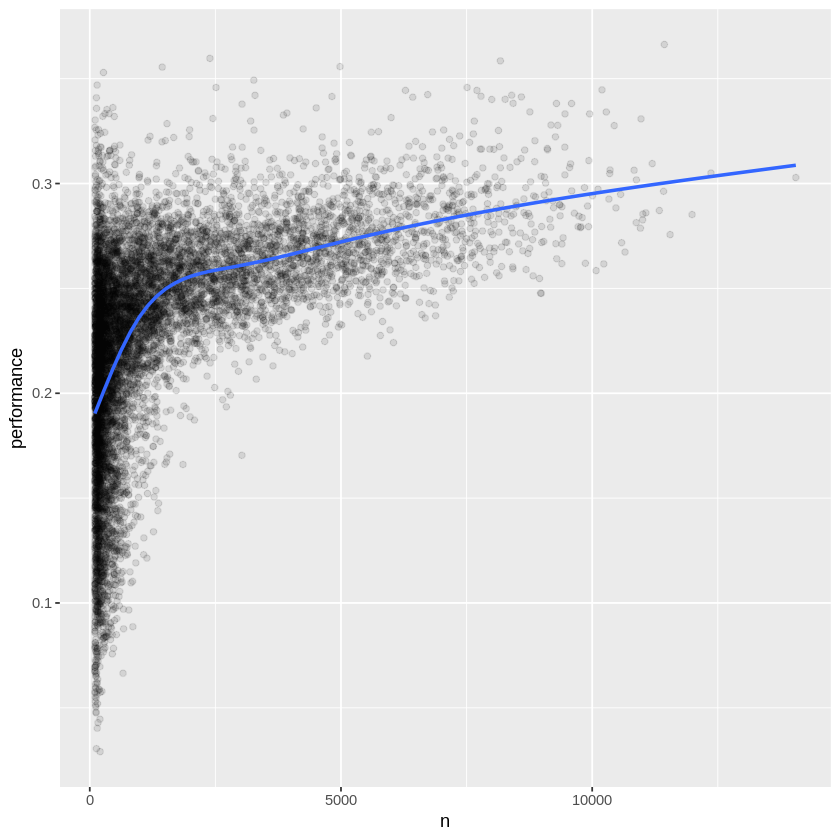

In [ ]:
batters |>
  filter(n > 100) |>
  ggplot(aes(x = n, y = performance)) +
  geom_point(alpha = 1 / 10) +
  geom_smooth(se = FALSE)

Note the handy pattern for combining ggplot2 and dplyr. You just have to remember to switch from |>, for dataset processing, to + for adding layers to your plot.

This also has important implications for ranking. If you naively sort on desc(performance), the people with the best batting averages are clearly the ones who tried to put the ball in play very few times and happened to get a hit, they’re not necessarily the most skilled players:

In [ ]:
batters |>
  arrange(desc(performance))

playerID,performance,n
<chr>,<dbl>,<int>
abramge01,1,1
alberan01,1,1
banisje01,1,1
bartocl01,1,1
bassdo01,1,1
birasst01,1,2
bruneju01,1,1
burnscb01,1,1
cammaer01,1,1


## Summary

In this chapter, we’ve learned the tools that dplyr provides for working with data frames. The tools are roughly grouped into three categories: those that manipulate the rows (like filter() and arrange()), those that manipulate the columns (like select() and mutate()) and those that manipulate groups (like group_by() and summarize()).